# A6
Alice Gee, ag67642 <br>
Andrew Yang, ay6764 <br>
Mohammad Aga, mba929 <br>

# 5.69

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euler_midpoint (f, x0, y0, xmax, h): 
    # set up the domain of the function between x0, xmax, and h
    x = np.linspace(x0, xmax)

    # zero out the range of the function for the given domain
    y = np.zeros_like (x)
    m = np.zeros_like(x)

    # fill in the initial conditions
    x[0] = x0
    y[0] = y0
    m[0] = f(x[0], y[0])

    # now compute the range using Euler's approximation
    for i in range (1, len(x)):
        m[i-1] = f(x[i-1], y[i-1])
        y_temp = y[i-1] + (h/2) * m[i-1]
        x[i] = x[i-1] + h
        y[i] = y[i-1] + h*f(x[i-1] + h/2, y_temp)

    # return the solution
    return x, y

In [3]:
def euler_1d (f, x0, y0, xmax, h): 
    # set up the domain of the function between x0, xmax, and h
    x = np.linspace(x0, xmax)

    # zero out the range of the function for the given domain
    y = np.zeros_like (x)

    # fill in the initial conditions
    x[0] = x0
    y[0] = y0

    # now compute the range using Euler's approximation
    for i in range (1, len(x)):
        x[i] = x[i-1] + h
        y[i] = y[i-1] + h*f(x[i-1], y[i-1])

    # return the solution
    return x, y

In [4]:
def rk4_1d (f, x0, y0, xmax, h): 
    # set up the domain of the function between x0, xmax, and h
    x = np.linspace(x0, xmax)

    # zero out the range of the function for the given domain
    y = np.zeros_like (x)

    # fill in the initial conditions
    x[0] = x0
    y[0] = y0

    # now compute the range using the Runge-Kutta formalism
    for i in range (1, len(x)):
        k1 = h * f (x[i-1], y[i-1])
        k2 = h * f (x[i-1] + h/2, y[i-1] + k1/2)
        k3 = h * f (x[i-1] + h/2, y[i-1] + k2/2)
        k4 = h * f (x[i-1] + h, y[i-1] + k3)
        delta_y = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x[i] = x[i-1] + h
        y[i] = y[i-1] + delta_y

    # return the solution
    return x, y

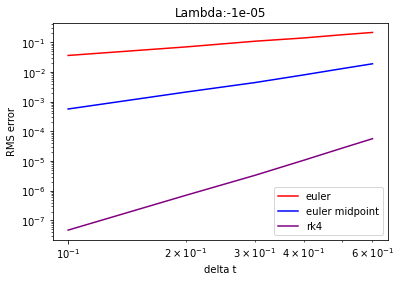

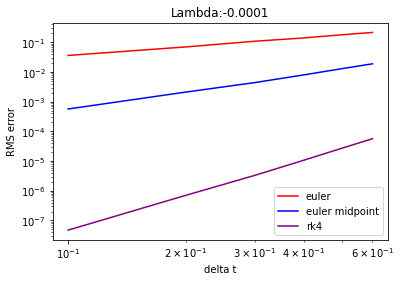

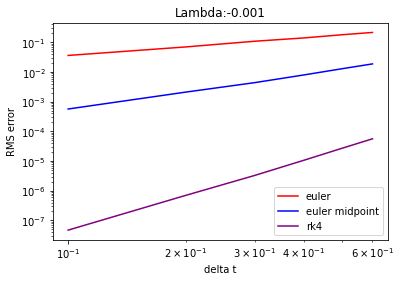

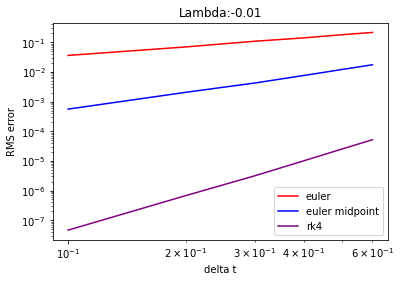

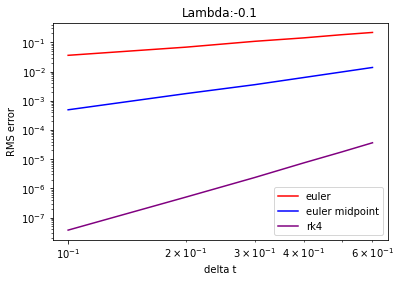

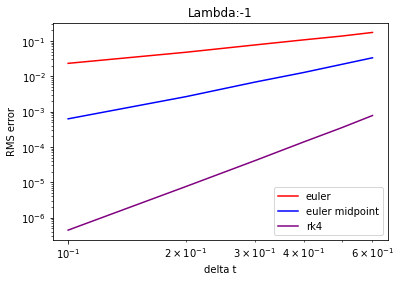

In [5]:
def main():
    L_store = [-.00001, -.0001, -.001, -.01, -.1, -1]
    C1 = 0.5
    f = lambda x, y: L*(y-np.cos(x)) - np.sin(x)
    f_actual = lambda x: C1*np.exp(L*x) + np.cos(x)
    intervals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
    
    for L in L_store: 
        euler_error_store = []
        euler_mid_error_store = []
        rk4_error = []
        for dx in intervals:
            # specify the initial conditions
            x0 = 0
            y0 = 1.5
            # specify the max in your domain
            xmax = 5

            # get the solution of the differential equation
            x, y = euler_1d (f, x0, y0, xmax, dx)
            x1, y1 = euler_midpoint (f, x0, y0, xmax, dx)
            x2, y2 = rk4_1d (f, x0, y0, xmax, dx)

            # for the vector (domain) x get the analytical range y_actual
            y_actual = 0.5*np.exp(L*x) + np.cos(x)

            # store all the y_error
            euler_error_store.append(np.sqrt(np.mean((y - y_actual)**2)))
            euler_mid_error_store.append(np.sqrt(np.mean((y1 - y_actual)**2)))
            rk4_error.append(np.sqrt(np.mean((y2 - y_actual)**2)))

        plt.figure()
        plt.loglog(intervals, euler_error_store, "red", label = 'euler')
        plt.loglog(intervals, euler_mid_error_store, "blue", label = 'euler midpoint')
        plt.loglog(intervals, rk4_error, "purple", label = 'rk4')
        plt.legend(['euler', 'euler midpoint', 'rk4'])
        plt.legend()
        plt.title("Lambda:" + str(L))
        plt.xlabel("delta t")
        plt.ylabel("RMS error")
        plt.show()
        

main()

# 5.72

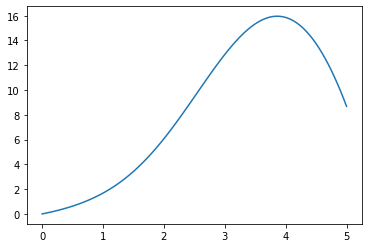

In [16]:
#x_prime = lambda x2: x2 
x_double_prime = lambda x1, x2, t: np.cos(t)*x2 + np.sin(t)*x1
F = [x_double_prime]
t0 = 0
t_max = 5

def euler (F, t0, t_max):    
    # time interval 
    t = np.linspace(t0, t_max, 100)
    x = np.zeros_like (t)
    x_prime = np.zeros_like (t)
    
    # movement 
    x[0] = 0
    x_prime[0] = 1
    
    for i in range(1, 100):
        x[i] = x[i-1] + (t[i] - t[i-1]) * x_prime[i-1]
        x_prime[i] = x_prime[i-1] + (t[i] - t[i-1]) * F[0](x[i-1], x_prime[i-1], t[i-1])
     
    return(x, t)

x, t = euler(F, t0, t_max)
plt.plot(t, x)

# 5.74

$x'(t)$ = $v_x$ <br>
$x''(t)$ = $(-x /(x^2 + y^2)^{3/2})$ <br>
$y'(t)$ = $v_y$ <br>
$y''(t)$ = $(-y /(x^2 + y^2)^{3/2})$

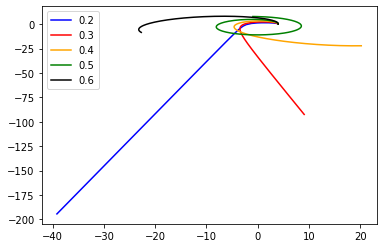

In [17]:
import math
x_prime = lambda v: v
x_double_prime = lambda x, y: (-x / (math.sqrt(x**2 + y**2))**3)
y_prime = lambda v: v
y_double_prime = lambda x, y: (-y / (math.sqrt(x**2 + y**2))**3)
F = [x_prime, y_prime, x_double_prime, y_double_prime]
t0 = 0
t_max = 175

def euler (F, t0, t_max, y0):    
    # time interval 
    t = np.linspace(t0, t_max, t_max)
    x = np.zeros_like (t)
    y = np.zeros_like (t)
    vx = np.zeros_like (t)
    vy = np.zeros_like (t)
    
    # movement 
    x[0] = 4
    y[0] = 0
    vx[0] = 0
    vy[0] = y0
    
    for i in range(1, t_max):
        x[i] = x[i-1] + (t[i] - t[i-1]) * vx[i-1]
        vx[i] = vx[i-1] + (t[i] - t[i-1]) * F[2](x[i-1], y[i-1])
        
        y[i] = y[i-1] + (t[i] - t[i-1]) * vy[i-1]
        vy[i] = vy[i-1] + (t[i] - t[i-1]) * F[3](x[i-1], y[i-1])
     
    return(x, y)

y0_store = [0.2, 0.3, 0.4, 0.5, 0.6]
color = ["blue", "red", "orange", "green", "black"]
for i in range(len(y0_store)):
    x, y = euler (F, t0, t_max, y0_store[i])
    plt.plot(x,y, color = color[i], label = str(y0_store[i]))
y0_store = [str(y0) for y0 in y0_store]
plt.legend(y0_store)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

x, y = euler (F, t0, t_max, 0.5)

fig, ax = plt.subplots()
plt.close()
# Below we set up many of the global parameters for the plot.
# Much of what we do here depends on what we are trying to animate.
ax.grid()
ax.set_xlabel('Time')
ax.set_ylabel('Approximate Solution')
ax.set_xlim((-10, 10)) 
ax.set_ylim(-15, 8) 
frame, = ax.plot([], [], linewidth=2, linestyle='--') 
# notice we also set line and marker parameters here

def animator(N): # N is the animation frame number
  X = x[:N] # get t data up to the frame number
  Y = y[:N] # get x data up to the frame number
  # display the current simulation time in the title
  ax.set_title('X-axis='+ str((x[N]))) 
  # put the data for the current frame into the varable "frame"
  frame.set_data(X,Y) 
  return (frame,)

# The Euler solution takes many very small time steps.  
# To speed up the animation we view every 10th iteration.
PlotFrames = range(t0,t_max,3) 
anim = animation.FuncAnimation(fig, # call on the figure
# next call the function that builds the animation frame
                               animator, 
# next tell which frames to pass to animator
                               frames=PlotFrames, 
# lastly give the delay between frames                         
                               interval=100 
                               ) 

rc('animation', html='jshtml') # embed in the HTML for Google Colab
anim # show the animation

# 5.79

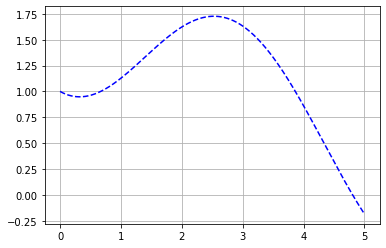

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

# function ≈ x'(t)
f = lambda x, t: -(1/3.0)*x + np.sin(t)

# inital x-position value
x0 = 1

# the span of t (which is on the x axis)
t = np.linspace(0,5,1000)

# scipy function to solve for a one dimensional differential equation
x = scipy.integrate.odeint(f,x0,t)

# plot the x(t) solution from the one dimensional differential equation 
plt.plot(t,x[:,0],'b--')
plt.grid()
plt.show()

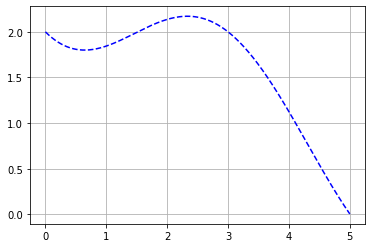

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

# function ≈ x'(t)
f = lambda x, t: -(1/3.0)*x + np.sin(t)

# inital x-position value
x0 = 2

# the span of t (which is on the x axis)
t = np.linspace(0,5,1000)

# scipy function to solve for a one dimensional differential equation
x = scipy.integrate.odeint(f,x0,t)

# plot the x(t) solution from the one dimensional differential equation 
plt.plot(t,x[:,0],'b--')
plt.grid()
plt.show()

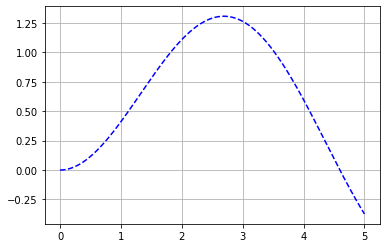

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

# function ≈ x'(t)
f = lambda x, t: -(1/3.0)*x + np.sin(t)

# inital x-position value
x0 = 0

# the span of t (which is on the x axis)
t = np.linspace(0,5,1000)

# scipy function to solve for a one dimensional differential equation
x = scipy.integrate.odeint(f,x0,t)

# plot the x(t) solution from the one dimensional differential equation 
plt.plot(t,x[:,0],'b--')
plt.grid()
plt.show()

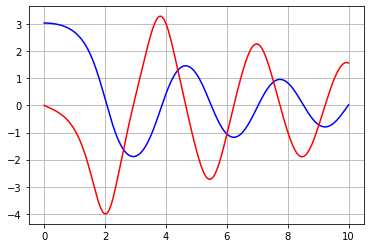

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

# x' and y' functions for the differential equations; F[0] = x', F[1] = y'
F = lambda x, t, b, c: [x[1] , -b*x[1] - c*np.sin(x[0])]

# x0[0] = initial x angle, x0[1] = initial y angular velocity  
x0 = [np.pi - 0.1 , 0]

# the span of t (which is on the x axis)
t = np.linspace(0,10,1000)

# constants that are used in the function 
b = 0.25
c = 5

# scipy function to solve for a one dimensional differential equation
x = scipy.integrate.odeint(F, x0, t, args=(b, c))

# plot the x(t) and y(t) solution from the one dimensional differential equation
plt.plot(t,x[:,0],'b',t,x[:,1],'r')
plt.grid()
plt.show()

The initial angle is $\pi - 0.1$, with the initial angular velocity being 0. In other words, the pendulum is lifted above the equilibrium point (i.e. angle = 0), but is not moving. 

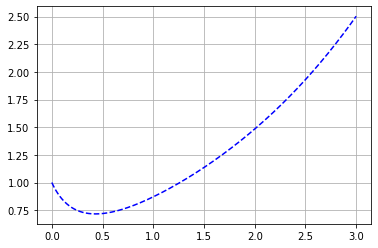

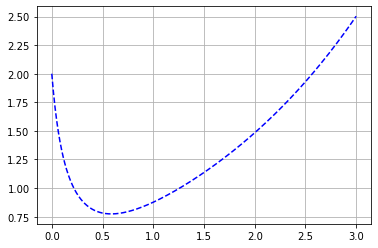

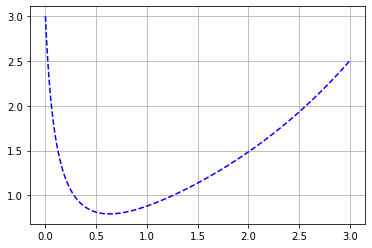

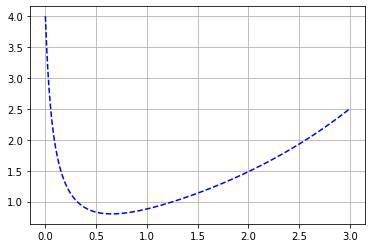

In [23]:
# function ≈ x'(t)
f = lambda x, t: -(3)*x**2 + np.exp(t)
x0_store = [1,2,3,4]

for x0 in x0_store: 
    # inital x-position value

    # the span of t (which is on the x axis)
    t = np.linspace(0,3,750)

    # scipy function to solve for a one dimensional differential equation
    x = scipy.integrate.odeint(f,x0,t)

    # plot the x(t) solution from the one dimensional differential equation 
    plt.plot(t,x[:,0],'b--')
    plt.grid()
    plt.show()

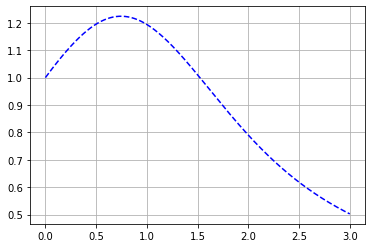

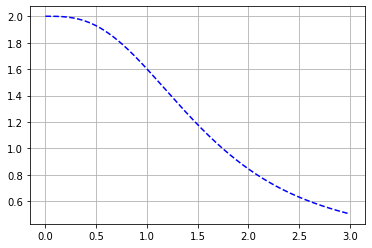

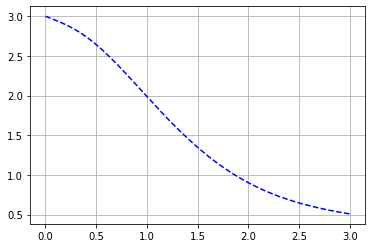

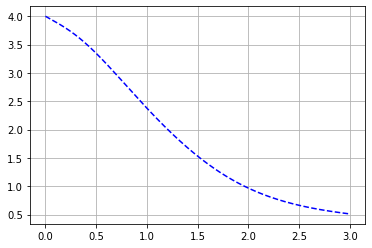

In [12]:
# function ≈ x'(t)
f = lambda x, t: -(1/2)*x + np.cos(t*x)
x0_store = [1,2,3,4]

for x0 in x0_store: 
    # the span of t (which is on the x axis)
    t = np.linspace(0,3,500)

    # scipy function to solve for a one dimensional differential equation
    x = scipy.integrate.odeint(f,x0,t)

    # plot the x(t) solution from the one dimensional differential equation
    plt.plot(t,x[:,0],'b--')
    plt.grid()
    plt.show()

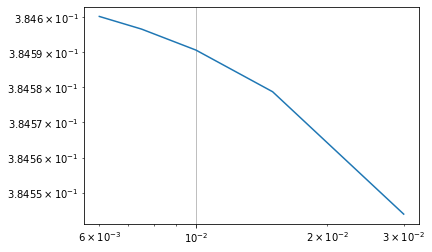

[0.38454388298855635, 0.38457874162178457, 0.38459060663884115, 0.38459658491944354, 0.38460018757454106]


In [13]:
# function ≈ x'(t)
f = lambda y, x: -(1/3)*y + np.sin(x)
h_store = [100, 200, 300, 400, 500]
error_store = []

for h in h_store: 
    # inital x-position value
    x0 = 2

    # the span of t (which is on the x axis)
    t = np.linspace(0,3,h)

    # scipy function to solve for a one dimensional differential equation
    x = scipy.integrate.odeint(f,x0,t)
    
    x_actual = (1/10) * (19 * np.exp(-x/3) + 3 * np.sin(x) - 9 * np.cos(x))

    # store all the x_error
    error_store.append(np.sqrt(np.mean((x - x_actual)**2)))

# get interval size 
h_store = [3/h for h in h_store]
plt.loglog(h_store, error_store)
plt.grid()
plt.show()
print(error_store)

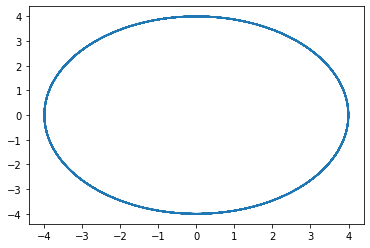

In [14]:
import math
initial_state = [4, 0, 0, 0.5]
time = np.linspace(0, 1000, 1000)
def system(state, t):
    x, y, vx, vy = state
    x_double_prime = (-x / (math.sqrt(x**2 + y**2))**3)
    y_double_prime = (-y / (math.sqrt(x**2 + y**2))**3)

    return([vx, vy, x_double_prime, y_double_prime])

xy = scipy.integrate.odeint(system, initial_state, time)

x = xy[:,0]
y = xy[:,1]
plt.plot(x,y)